### Evaluation of the F1 score and the proxy A distance-derived metric


In [1]:
import os
import pickle

F1=pickle.load(open('F1_MIDOG.p','rb'))
F1Werte=[]
PADWerte=[]
scanner = ['TUPAC', 'XR','S360','CS2','GT450']
d = {k:{k:[] for k in scanner} for k in scanner}
for f in sorted(os.listdir('.')):
    if 'padstar_clahead' in f:
        spl = f.split('.')[0].split('_')
        fromscanner = int(spl[2])
        toscanner = int(spl[3])
        run = int(spl[4])
        pad=pickle.load(open(f,'rb'))
        d[scanner[fromscanner]][scanner[toscanner]].append(pad)
        if toscanner ==4:
            continue
        F1Werte.append(F1[scanner[fromscanner]][scanner[toscanner]][run])
        PADWerte.append(pad)


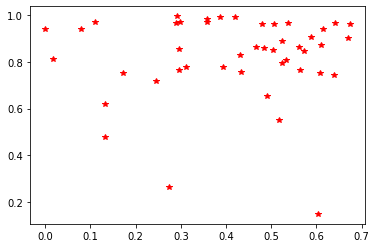

In [2]:
import matplotlib.pyplot as plt
plt.plot(F1Werte,PADWerte,'r*')

## Calculate corr coeff between individual training runs' values of the F1 score and the PAD* metric

In [3]:
import numpy as np
np.corrcoef(F1Werte,PADWerte)

array([[1.        , 0.03931056],
       [0.03931056, 1.        ]])

## Print table for publication

In [4]:
for k in ['TUPAC','XR','CS2','S360']:
    print(k,'& ',end='')
    inf_scanner=[]
    
    for y in ['XR','CS2','S360']:
        inf_scanner.append('%.3f $\\pm$ %.2f' % (np.mean(list(F1[k][y].values())), np.std(list(F1[k][y].values()))))

    for y in ['XR','CS2','S360']:
        if (k==y):
            inf_scanner.append('-')
        else:
            inf_scanner.append('%.3f $\\pm$ %.2f' % (np.mean(d[k][y]), np.std(d[k][y])))

        
    print('&'.join(inf_scanner),'\\\\')

TUPAC & 0.553 $\pm$ 0.04&0.613 $\pm$ 0.05&0.404 $\pm$ 0.09&0.719 $\pm$ 0.28&0.906 $\pm$ 0.07&0.945 $\pm$ 0.09 \\
XR & 0.578 $\pm$ 0.03&0.138 $\pm$ 0.13&0.190 $\pm$ 0.06&-&0.861 $\pm$ 0.07&0.567 $\pm$ 0.18 \\
CS2 & 0.390 $\pm$ 0.10&0.751 $\pm$ 0.02&0.433 $\pm$ 0.17&0.946 $\pm$ 0.04&-&0.931 $\pm$ 0.04 \\
S360 & 0.432 $\pm$ 0.08&0.574 $\pm$ 0.09&0.721 $\pm$ 0.03&0.769 $\pm$ 0.06&0.741 $\pm$ 0.11&- \\


In [5]:
np.mean(PADWerte)

0.8206087177722818

## Create images for publication

NameError: name 'imgs' is not defined

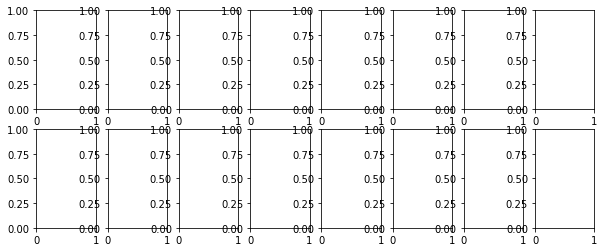

In [6]:
import cv2
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,8,figsize=(10,4))
ax = ax.reshape(4,4)
for scanner in range(4):
    for k in range(4):
        img = np.random.choice(imgs[scanner*50+1:scanner*50+50])
        img = cv2.imread('images_training/'+img)
        img = img[:,:,::-1]
        x,y = np.random.randint(1,2000),np.random.randint(1,2000)
        sel = img[x:x+300,y:y+300,:]
        ax[scanner,k].imshow(sel)
        ax[scanner,k].axis('off')
plt.tight_layout()
plt.savefig('patches_scanners.svg')